了解如何 reset Tensorflow Graph

學習如何以迴圈方式訓練不同超參數的模型

學習如何以迴圈方式繪圖

In [2]:
import os
import tensorflow.keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = tensorflow.keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = tensorflow.keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = tensorflow.keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tensorflow.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = tensorflow.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = tensorflow.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = tensorflow.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [8]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    tensorflow.keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = tensorflow.keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

50000/50000 [==============================] - 1s 29us/sample - loss: 2.3039 - accuracy: 0.1020 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.3042 - accuracy: 0.0985 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.3038 - accuracy: 0.1011 - val_loss: 2.3033 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________________

50000/50000 [==============================] - 1s 29us/sample - loss: 0.4385 - accuracy: 0.8415 - val_loss: 2.0601 - val_accuracy: 0.5193
Epoch 46/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.4166 - accuracy: 0.8509 - val_loss: 2.2836 - val_accuracy: 0.5232
Epoch 47/50
50000/50000 [==============================] - 1s 28us/sample - loss: 0.4079 - accuracy: 0.8536 - val_loss: 2.2569 - val_accuracy: 0.5222
Epoch 48/50
50000/50000 [==============================] - 1s 28us/sample - loss: 0.3973 - accuracy: 0.8574 - val_loss: 2.3308 - val_accuracy: 0.5207
Epoch 49/50
50000/50000 [==============================] - 1s 28us/sample - loss: 0.3842 - accuracy: 0.8626 - val_loss: 2.2758 - val_accuracy: 0.5205
Epoch 50/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.3745 - accuracy: 0.8647 - val_loss: 2.2009 - val_accuracy: 0.5219
Experiment with LR = 0.001000
Model: "model"
_________________________________________________________________
L

50000/50000 [==============================] - 1s 29us/sample - loss: 0.9502 - accuracy: 0.6663 - val_loss: 1.3897 - val_accuracy: 0.5208
Epoch 43/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.9402 - accuracy: 0.6711 - val_loss: 1.4370 - val_accuracy: 0.5161
Epoch 44/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.9272 - accuracy: 0.6751 - val_loss: 1.4054 - val_accuracy: 0.5210
Epoch 45/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.9214 - accuracy: 0.6751 - val_loss: 1.3620 - val_accuracy: 0.5342
Epoch 46/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.9016 - accuracy: 0.6855 - val_loss: 1.4967 - val_accuracy: 0.4965
Epoch 47/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.8937 - accuracy: 0.6856 - val_loss: 1.4830 - val_accuracy: 0.5115
Epoch 48/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.8775 - accuracy: 0.6930 - va

50000/50000 [==============================] - 1s 29us/sample - loss: 1.6069 - accuracy: 0.4410 - val_loss: 1.6146 - val_accuracy: 0.4391
Epoch 40/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.6015 - accuracy: 0.4415 - val_loss: 1.6131 - val_accuracy: 0.4405
Epoch 41/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5969 - accuracy: 0.4426 - val_loss: 1.6092 - val_accuracy: 0.4395
Epoch 42/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5918 - accuracy: 0.4447 - val_loss: 1.6036 - val_accuracy: 0.4406
Epoch 43/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5874 - accuracy: 0.4476 - val_loss: 1.5992 - val_accuracy: 0.4411
Epoch 44/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5827 - accuracy: 0.4490 - val_loss: 1.5940 - val_accuracy: 0.4418
Epoch 45/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5781 - accuracy: 0.4504 - va

50000/50000 [==============================] - 2s 31us/sample - loss: 1.9568 - accuracy: 0.3163 - val_loss: 1.9529 - val_accuracy: 0.3196
Epoch 37/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.9524 - accuracy: 0.3181 - val_loss: 1.9486 - val_accuracy: 0.3201
Epoch 38/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.9481 - accuracy: 0.3185 - val_loss: 1.9444 - val_accuracy: 0.3197
Epoch 39/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.9438 - accuracy: 0.3201 - val_loss: 1.9402 - val_accuracy: 0.3213
Epoch 40/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.9397 - accuracy: 0.3214 - val_loss: 1.9363 - val_accuracy: 0.3221
Epoch 41/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.9357 - accuracy: 0.3225 - val_loss: 1.9324 - val_accuracy: 0.3226
Epoch 42/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.9318 - accuracy: 0.3237 - va

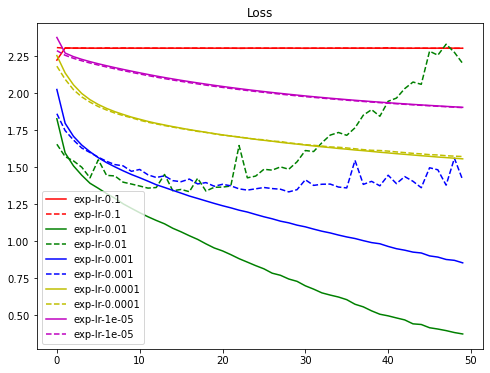

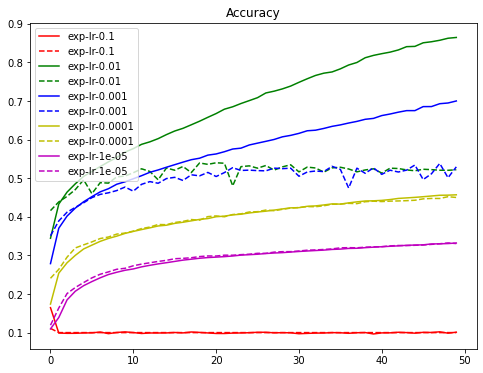

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work

請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [10]:
import itertools

In [11]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = tensorflow.keras.datasets.cifar10.load_data()

In [12]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [15]:
results = {}
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    tensorflow.keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = tensorflow.keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.70
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/500

50000/50000 [==============================] - 1s 29us/sample - loss: 0.7533 - accuracy: 0.7259 - val_loss: 2.0461 - val_accuracy: 0.4530
Epoch 49/50
50000/50000 [==============================] - 2s 30us/sample - loss: 0.7505 - accuracy: 0.7288 - val_loss: 1.8943 - val_accuracy: 0.4782
Epoch 50/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.7358 - accuracy: 0.7339 - val_loss: 1.9175 - val_accuracy: 0.4895
Experiment with LR = 0.100000, Momentum = 0.90
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________

50000/50000 [==============================] - 1s 29us/sample - loss: 1.2163 - accuracy: 0.5632 - val_loss: 1.6785 - val_accuracy: 0.4644
Epoch 46/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.2116 - accuracy: 0.5659 - val_loss: 1.5705 - val_accuracy: 0.4683
Epoch 47/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.2002 - accuracy: 0.5704 - val_loss: 1.6034 - val_accuracy: 0.4514
Epoch 48/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.1967 - accuracy: 0.5691 - val_loss: 1.5781 - val_accuracy: 0.4710
Epoch 49/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.1963 - accuracy: 0.5691 - val_loss: 1.6521 - val_accuracy: 0.4615
Epoch 50/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.1851 - accuracy: 0.5745 - val_loss: 1.5906 - val_accuracy: 0.4701
Experiment with LR = 0.100000, Momentum = 0.95
Model: "model"
__________________________________________________

50000/50000 [==============================] - 2s 31us/sample - loss: 1.4598 - accuracy: 0.4891 - val_loss: 1.6807 - val_accuracy: 0.4362
Epoch 43/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.4578 - accuracy: 0.4885 - val_loss: 1.6916 - val_accuracy: 0.4263
Epoch 44/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.4485 - accuracy: 0.4915 - val_loss: 1.6394 - val_accuracy: 0.4332
Epoch 45/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.4453 - accuracy: 0.4937 - val_loss: 1.6515 - val_accuracy: 0.4437
Epoch 46/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.4448 - accuracy: 0.4939 - val_loss: 1.6513 - val_accuracy: 0.4333
Epoch 47/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.4313 - accuracy: 0.4959 - val_loss: 1.7346 - val_accuracy: 0.4222
Epoch 48/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.4352 - accuracy: 0.4987 - va

50000/50000 [==============================] - 2s 31us/sample - loss: 2.3075 - accuracy: 0.1001 - val_loss: 2.3081 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.3076 - accuracy: 0.0994 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.3076 - accuracy: 0.0996 - val_loss: 2.3085 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.3070 - accuracy: 0.0975 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.3057 - accuracy: 0.0999 - val_loss: 2.3078 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.3063 - accuracy: 0.1001 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.3068 - accuracy: 0.0990 - va

50000/50000 [==============================] - 1s 29us/sample - loss: 1.0297 - accuracy: 0.6362 - val_loss: 1.3343 - val_accuracy: 0.5373
Epoch 37/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.0103 - accuracy: 0.6440 - val_loss: 1.3776 - val_accuracy: 0.5236
Epoch 38/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.0024 - accuracy: 0.6505 - val_loss: 1.5922 - val_accuracy: 0.4815
Epoch 39/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.9895 - accuracy: 0.6531 - val_loss: 1.4817 - val_accuracy: 0.4976
Epoch 40/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.9756 - accuracy: 0.6587 - val_loss: 1.5862 - val_accuracy: 0.4681
Epoch 41/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.9625 - accuracy: 0.6617 - val_loss: 1.5318 - val_accuracy: 0.4860
Epoch 42/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.9512 - accuracy: 0.6670 - va

50000/50000 [==============================] - 2s 31us/sample - loss: 0.7453 - accuracy: 0.7360 - val_loss: 1.5644 - val_accuracy: 0.5166
Epoch 34/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.7237 - accuracy: 0.7439 - val_loss: 1.5425 - val_accuracy: 0.5284
Epoch 35/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.7062 - accuracy: 0.7482 - val_loss: 1.5191 - val_accuracy: 0.5325
Epoch 36/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.6858 - accuracy: 0.7583 - val_loss: 1.5714 - val_accuracy: 0.5255
Epoch 37/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.6650 - accuracy: 0.7640 - val_loss: 1.6223 - val_accuracy: 0.5098
Epoch 38/50
50000/50000 [==============================] - 2s 30us/sample - loss: 0.6396 - accuracy: 0.7730 - val_loss: 1.5929 - val_accuracy: 0.5378
Epoch 39/50
50000/50000 [==============================] - 2s 30us/sample - loss: 0.6206 - accuracy: 0.7783 - va

50000/50000 [==============================] - 2s 31us/sample - loss: 0.7318 - accuracy: 0.7376 - val_loss: 1.5040 - val_accuracy: 0.5325
Epoch 31/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.7041 - accuracy: 0.7470 - val_loss: 1.5104 - val_accuracy: 0.5325
Epoch 32/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.6863 - accuracy: 0.7534 - val_loss: 1.5532 - val_accuracy: 0.5431
Epoch 33/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.6562 - accuracy: 0.7659 - val_loss: 1.6327 - val_accuracy: 0.5408
Epoch 34/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.6422 - accuracy: 0.7712 - val_loss: 1.6134 - val_accuracy: 0.5355
Epoch 35/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.6134 - accuracy: 0.7797 - val_loss: 1.6719 - val_accuracy: 0.5202
Epoch 36/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.5908 - accuracy: 0.7890 - va

50000/50000 [==============================] - 1s 29us/sample - loss: 1.0269 - accuracy: 0.6319 - val_loss: 1.5152 - val_accuracy: 0.5048
Epoch 28/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.0104 - accuracy: 0.6359 - val_loss: 1.5311 - val_accuracy: 0.4993
Epoch 29/50
50000/50000 [==============================] - 1s 30us/sample - loss: 0.9803 - accuracy: 0.6464 - val_loss: 1.6118 - val_accuracy: 0.5005
Epoch 30/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.9561 - accuracy: 0.6571 - val_loss: 1.5778 - val_accuracy: 0.5114
Epoch 31/50
50000/50000 [==============================] - 1s 29us/sample - loss: 0.9443 - accuracy: 0.6586 - val_loss: 1.6395 - val_accuracy: 0.5000
Epoch 32/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.9613 - accuracy: 0.6565 - val_loss: 1.6521 - val_accuracy: 0.5027
Epoch 33/50
50000/50000 [==============================] - 2s 31us/sample - loss: 0.9423 - accuracy: 0.6620 - va

50000/50000 [==============================] - 2s 31us/sample - loss: 1.6078 - accuracy: 0.4393 - val_loss: 1.6227 - val_accuracy: 0.4319
Epoch 25/50
50000/50000 [==============================] - 2s 30us/sample - loss: 1.5995 - accuracy: 0.4434 - val_loss: 1.6078 - val_accuracy: 0.4352
Epoch 26/50
50000/50000 [==============================] - 2s 30us/sample - loss: 1.5926 - accuracy: 0.4449 - val_loss: 1.6033 - val_accuracy: 0.4360
Epoch 27/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5844 - accuracy: 0.4491 - val_loss: 1.5946 - val_accuracy: 0.4378
Epoch 28/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5762 - accuracy: 0.4504 - val_loss: 1.6106 - val_accuracy: 0.4343
Epoch 29/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5696 - accuracy: 0.4535 - val_loss: 1.5838 - val_accuracy: 0.4428
Epoch 30/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5625 - accuracy: 0.4570 - va

50000/50000 [==============================] - 1s 29us/sample - loss: 1.4191 - accuracy: 0.5007 - val_loss: 1.4669 - val_accuracy: 0.4754
Epoch 22/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.4077 - accuracy: 0.5066 - val_loss: 1.4604 - val_accuracy: 0.4753
Epoch 23/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.3951 - accuracy: 0.5102 - val_loss: 1.4488 - val_accuracy: 0.4822
Epoch 24/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.3823 - accuracy: 0.5134 - val_loss: 1.4553 - val_accuracy: 0.4837
Epoch 25/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.3715 - accuracy: 0.5184 - val_loss: 1.4458 - val_accuracy: 0.4824
Epoch 26/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.3590 - accuracy: 0.5231 - val_loss: 1.4310 - val_accuracy: 0.4877
Epoch 27/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.3477 - accuracy: 0.5261 - va

50000/50000 [==============================] - 1s 29us/sample - loss: 1.2864 - accuracy: 0.5483 - val_loss: 1.4851 - val_accuracy: 0.4816
Epoch 19/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.2735 - accuracy: 0.5520 - val_loss: 1.4039 - val_accuracy: 0.5001
Epoch 20/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.2572 - accuracy: 0.5554 - val_loss: 1.3919 - val_accuracy: 0.5024
Epoch 21/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.2430 - accuracy: 0.5615 - val_loss: 1.3930 - val_accuracy: 0.5009
Epoch 22/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.2248 - accuracy: 0.5684 - val_loss: 1.3520 - val_accuracy: 0.5176
Epoch 23/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.2111 - accuracy: 0.5746 - val_loss: 1.3720 - val_accuracy: 0.5131
Epoch 24/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.1955 - accuracy: 0.5795 - va

50000/50000 [==============================] - 1s 29us/sample - loss: 1.1587 - accuracy: 0.5896 - val_loss: 1.3461 - val_accuracy: 0.5225
Epoch 16/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.1357 - accuracy: 0.5968 - val_loss: 1.3438 - val_accuracy: 0.5295
Epoch 17/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.1170 - accuracy: 0.6061 - val_loss: 1.3622 - val_accuracy: 0.5267
Epoch 18/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.0891 - accuracy: 0.6147 - val_loss: 1.3419 - val_accuracy: 0.5229
Epoch 19/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.0680 - accuracy: 0.6209 - val_loss: 1.3542 - val_accuracy: 0.5301
Epoch 20/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.0532 - accuracy: 0.6275 - val_loss: 1.3567 - val_accuracy: 0.5331
Epoch 21/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.0286 - accuracy: 0.6353 - va

50000/50000 [==============================] - 1s 29us/sample - loss: 2.0982 - accuracy: 0.2797 - val_loss: 2.0898 - val_accuracy: 0.2828
Epoch 13/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.0852 - accuracy: 0.2828 - val_loss: 2.0774 - val_accuracy: 0.2883
Epoch 14/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.0730 - accuracy: 0.2879 - val_loss: 2.0651 - val_accuracy: 0.2914
Epoch 15/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.0610 - accuracy: 0.2913 - val_loss: 2.0534 - val_accuracy: 0.2921
Epoch 16/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.0494 - accuracy: 0.2935 - val_loss: 2.0418 - val_accuracy: 0.2961
Epoch 17/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.0381 - accuracy: 0.2970 - val_loss: 2.0308 - val_accuracy: 0.2991
Epoch 18/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.0275 - accuracy: 0.2988 - va

50000/50000 [==============================] - 1s 29us/sample - loss: 1.9475 - accuracy: 0.3173 - val_loss: 1.9362 - val_accuracy: 0.3251
Epoch 10/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.9304 - accuracy: 0.3241 - val_loss: 1.9201 - val_accuracy: 0.3259
Epoch 11/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.9154 - accuracy: 0.3298 - val_loss: 1.9066 - val_accuracy: 0.3372
Epoch 12/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.9021 - accuracy: 0.3367 - val_loss: 1.8935 - val_accuracy: 0.3365
Epoch 13/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8900 - accuracy: 0.3396 - val_loss: 1.8823 - val_accuracy: 0.3406
Epoch 14/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.8789 - accuracy: 0.3442 - val_loss: 1.8722 - val_accuracy: 0.3453
Epoch 15/50
50000/50000 [==============================] - 2s 33us/sample - loss: 1.8686 - accuracy: 0.3493 - va

50000/50000 [==============================] - 2s 30us/sample - loss: 1.9255 - accuracy: 0.3275 - val_loss: 1.9108 - val_accuracy: 0.3307
Epoch 7/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.9000 - accuracy: 0.3374 - val_loss: 1.8889 - val_accuracy: 0.3399
Epoch 8/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8790 - accuracy: 0.3450 - val_loss: 1.8701 - val_accuracy: 0.3472
Epoch 9/50
50000/50000 [==============================] - 2s 30us/sample - loss: 1.8611 - accuracy: 0.3513 - val_loss: 1.8527 - val_accuracy: 0.3526
Epoch 10/50
50000/50000 [==============================] - 2s 31us/sample - loss: 1.8453 - accuracy: 0.3565 - val_loss: 1.8392 - val_accuracy: 0.3614
Epoch 11/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8309 - accuracy: 0.3635 - val_loss: 1.8256 - val_accuracy: 0.3641
Epoch 12/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8183 - accuracy: 0.3663 - val_l

50000/50000 [==============================] - 1s 30us/sample - loss: 1.8724 - accuracy: 0.3424 - val_loss: 1.8381 - val_accuracy: 0.3508
Epoch 4/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.8128 - accuracy: 0.3655 - val_loss: 1.7866 - val_accuracy: 0.3680
Epoch 5/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.7670 - accuracy: 0.3822 - val_loss: 1.7506 - val_accuracy: 0.3823
Epoch 6/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.7314 - accuracy: 0.3937 - val_loss: 1.7139 - val_accuracy: 0.3968
Epoch 7/50
50000/50000 [==============================] - 1s 30us/sample - loss: 1.6973 - accuracy: 0.4071 - val_loss: 1.6815 - val_accuracy: 0.4101
Epoch 8/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.6685 - accuracy: 0.4174 - val_loss: 1.6637 - val_accuracy: 0.4090
Epoch 9/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.6431 - accuracy: 0.4229 - val_loss

50000/50000 [==============================] - 2s 36us/sample - loss: 2.3969 - accuracy: 0.0961 - val_loss: 2.3685 - val_accuracy: 0.0941
Epoch 2/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.3578 - accuracy: 0.0951 - val_loss: 2.3409 - val_accuracy: 0.1027
Epoch 3/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.3371 - accuracy: 0.1041 - val_loss: 2.3247 - val_accuracy: 0.1146
Epoch 4/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.3242 - accuracy: 0.1134 - val_loss: 2.3139 - val_accuracy: 0.1212
Epoch 5/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.3151 - accuracy: 0.1201 - val_loss: 2.3061 - val_accuracy: 0.1265
Epoch 6/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.3081 - accuracy: 0.1246 - val_loss: 2.2999 - val_accuracy: 0.1295
Epoch 7/50
50000/50000 [==============================] - 2s 30us/sample - loss: 2.3024 - accuracy: 0.1282 - val_loss

50000/50000 [==============================] - 2s 35us/sample - loss: 2.3568 - accuracy: 0.1076 - val_loss: 2.3337 - val_accuracy: 0.1099
Epoch 2/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.3144 - accuracy: 0.1159 - val_loss: 2.3048 - val_accuracy: 0.1257
Epoch 3/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.2929 - accuracy: 0.1265 - val_loss: 2.2886 - val_accuracy: 0.1344
Epoch 4/50
50000/50000 [==============================] - 2s 31us/sample - loss: 2.2795 - accuracy: 0.1361 - val_loss: 2.2773 - val_accuracy: 0.1401
Epoch 5/50
50000/50000 [==============================] - 2s 30us/sample - loss: 2.2696 - accuracy: 0.1433 - val_loss: 2.2683 - val_accuracy: 0.1474
Epoch 6/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.2611 - accuracy: 0.1499 - val_loss: 2.2602 - val_accuracy: 0.1526
Epoch 7/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.2534 - accuracy: 0.1565 - val_loss

50000/50000 [==============================] - 2s 35us/sample - loss: 2.3444 - accuracy: 0.1153 - val_loss: 2.3002 - val_accuracy: 0.1228
Epoch 2/50
50000/50000 [==============================] - 2s 30us/sample - loss: 2.2855 - accuracy: 0.1350 - val_loss: 2.2699 - val_accuracy: 0.1520
Epoch 3/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.2601 - accuracy: 0.1649 - val_loss: 2.2484 - val_accuracy: 0.1758
Epoch 4/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.2395 - accuracy: 0.1894 - val_loss: 2.2297 - val_accuracy: 0.1988
Epoch 5/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.2212 - accuracy: 0.2054 - val_loss: 2.2127 - val_accuracy: 0.2090
Epoch 6/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.2046 - accuracy: 0.2206 - val_loss: 2.1973 - val_accuracy: 0.2208
Epoch 7/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.1898 - accuracy: 0.2299 - val_loss

50000/50000 [==============================] - 2s 35us/sample - loss: 2.2971 - accuracy: 0.1297 - val_loss: 2.2505 - val_accuracy: 0.1781
Epoch 2/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.2146 - accuracy: 0.2064 - val_loss: 2.1796 - val_accuracy: 0.2335
Epoch 3/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.1523 - accuracy: 0.2409 - val_loss: 2.1250 - val_accuracy: 0.2549
Epoch 4/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.1025 - accuracy: 0.2604 - val_loss: 2.0805 - val_accuracy: 0.2692
Epoch 5/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.0618 - accuracy: 0.2732 - val_loss: 2.0436 - val_accuracy: 0.2800
Epoch 6/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.0278 - accuracy: 0.2839 - val_loss: 2.0129 - val_accuracy: 0.2875
Epoch 7/50
50000/50000 [==============================] - 1s 29us/sample - loss: 1.9995 - accuracy: 0.2930 - val_loss

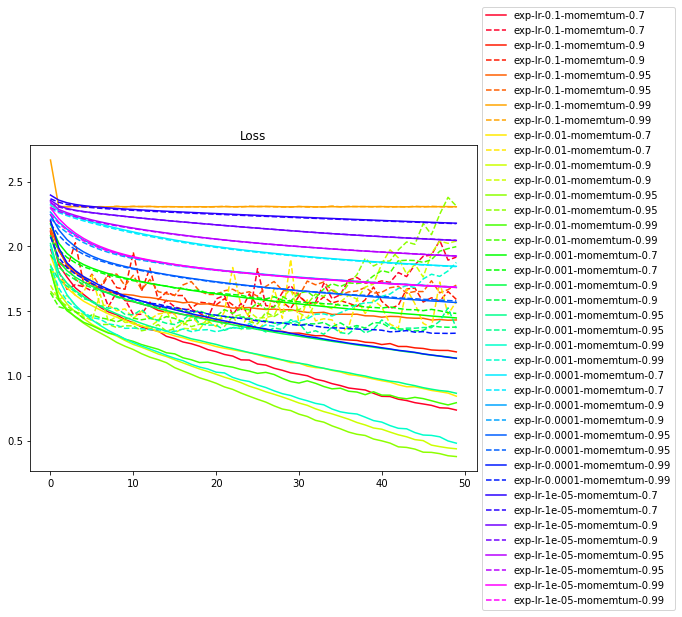

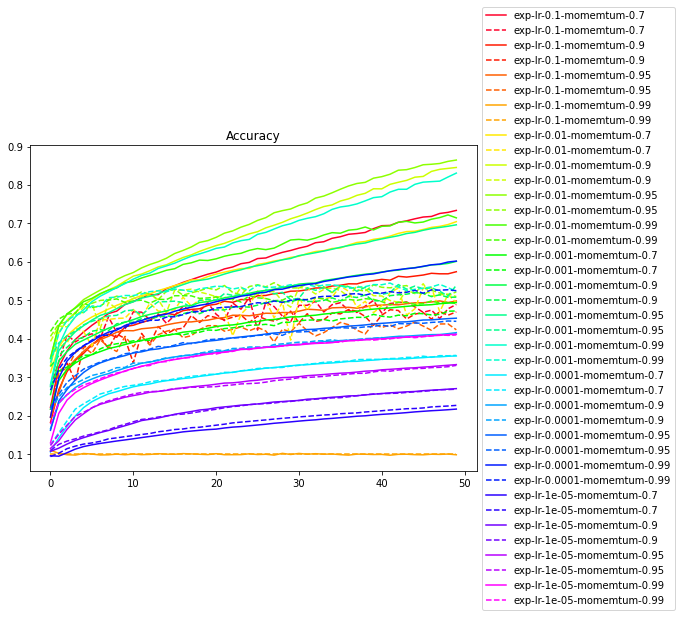

In [16]:
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()